In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import talib
import numpy as np
import lightgbm as lgb
import pyfolio as pf

In [50]:
#Step1 Get Original Data from Interactivebroker
filename = "SPY_20040123_20200529_30min.csv" #from IB
df = pd.read_csv(filename,index_col = 0)
# df.reset_index(drop=True,inplace=True)
print(df.shape)
print(df.head(1))
print(df.tail(1))

(54688, 7)
                        open     high      low    close  volume  average  \
date                                                                       
2004-01-23 08:30:00  115.015  115.155  114.895  115.005      -1     -1.0   

                     barCount  
date                           
2004-01-23 08:30:00        -1  
                       open    high      low    close  volume  average  \
date                                                                     
2020-05-29 14:30:00  303.63  304.96  303.315  304.025      -1     -1.0   

                     barCount  
date                           
2020-05-29 14:30:00        -1  


In [51]:
#Step2 check data

#Check NAN
print(df.isnull().values.any() )
print("before dropping NaN", df.shape)
df.dropna(inplace=True)
print("after dropping NaN", df.shape)

# print( df.info() )
print(type(df.index[0]), df.index[0])
df.index = pd.to_datetime(df.index)
# print( df.info() )
print(type(df.index[0]), df.index[0])

False
before dropping NaN (54688, 7)
after dropping NaN (54688, 7)
<class 'str'> 2004-01-23 08:30:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2004-01-23 08:30:00


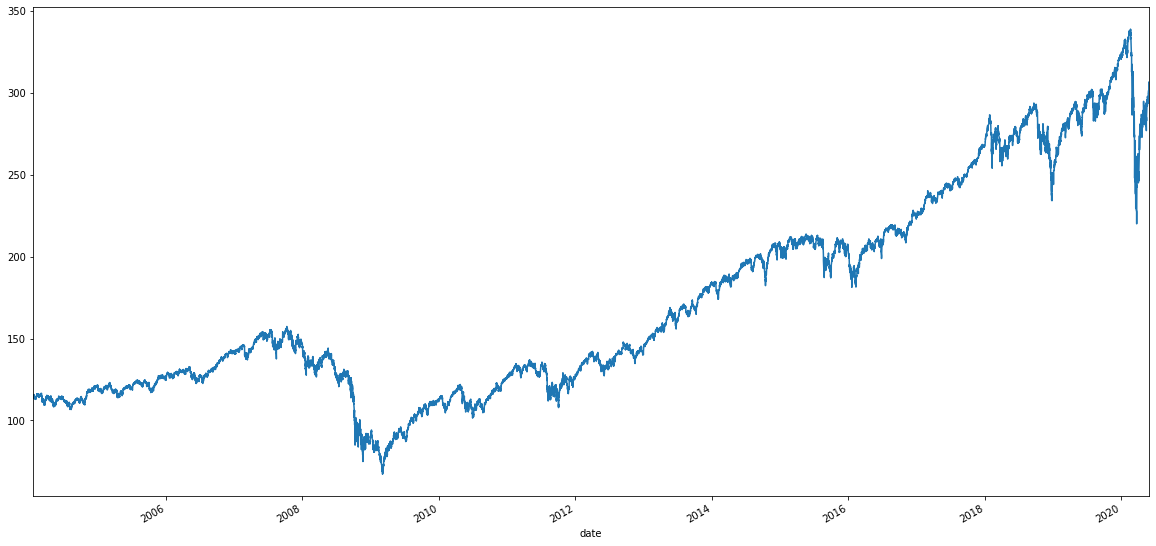

In [52]:
#Step Clean Data
tc=df.close #targetclose
plt.rcParams["figure.figsize"] = (20,10)
tc.plot()

In [53]:
# Feature 

In [54]:

%%time 
#Wall time: 4.09 s
import numpy as np
import tqdm

time_period = 200

cnn_x = []
cnn_y = []
indexs = []
for i in tqdm.tqdm_notebook(range(0, len(tc) - time_period - 1 - 11, 3)):
    s = tc.iloc[i:i+time_period].values
    cnn_x.append((s - s.min())/(s.max() - s.min()))
    r = tc.iloc[i+time_period+10] / tc.iloc[i+time_period-1]
    cnn_y.append(r)
    indexs.append(tc.index[i+time_period-1])

cnn_x = np.array(cnn_x)
cnn_y = np.array(cnn_y)
indexes = np.array(indexs)






Wall time: 3.29 s


Reshape features and labels

In [55]:
# cnn_x = cnn_x.reshape(len(cnn_x), time_period, 1)
print(cnn_x.shape) #(18159, 200, 1)
cnn_x = cnn_x.reshape(len(cnn_x) , 10, 20, 1)
print(cnn_x.shape)
cnn_y = cnn_y.reshape(len(cnn_y), 1)

(18159, 200)
(18159, 10, 20, 1)


In [56]:
# import talib
# import numpy as np
# import pandas as pd

# sma = talib.SMA(tc, timeperiod=120)
# wma = talib.WMA(tc, timeperiod=120)
# mom = talib.MOM(tc, timeperiod=120)
# k, d = talib.STOCH  (tc, tc, tc, fastk_period=120, slowk_period=60, slowd_period=60)
# k2, d2 = talib.STOCH(tc, tc, tc, fastk_period=240, slowk_period=120, slowd_period=120)
# k3, d3 = talib.STOCH(tc, tc, tc, fastk_period=360, slowk_period=180, slowd_period=180)
# k4, d4 = talib.STOCH(tc, tc, tc, fastk_period=480, slowk_period=240, slowd_period=240)
# k5, d5 = talib.STOCH(tc, tc, tc, fastk_period=640, slowk_period=320, slowd_period=320)
# k6, d6 = talib.STOCH(tc, tc, tc, fastk_period=720, slowk_period=360, slowd_period=360)
# k7, d7 = talib.STOCH(tc, tc, tc, fastk_period=840, slowk_period=420, slowd_period=420)
# k8, d8 = talib.STOCH(tc, tc, tc, fastk_period=960, slowk_period=480, slowd_period=480)

# rsi = talib.RSI (tc, timeperiod=120)
# rsi2 = talib.RSI(tc, timeperiod=240)
# rsi3 = talib.RSI(tc, timeperiod=480)
# rsi4 = talib.RSI(tc, timeperiod=640)
# rsi5 = talib.RSI(tc, timeperiod=720)
# rsi6 = talib.RSI(tc, timeperiod=840)

# macd1, macd2, macd3 = talib.MACD(tc, fastperiod=120, slowperiod=60, signalperiod=60)
# willr = talib.WILLR(tc, tc, tc, timeperiod=120)
# cci = talib.CCI(tc, tc, tc, timeperiod=120)

# dataset = pd.DataFrame({
#     'RSIb': rsi / 50,
#     'RSIb2': rsi2 / 50,
#     'RSIb3': rsi3 / 50,
#     'RSIb4': rsi4 / 50,
#     'RSIb5': rsi5 / 50,
#     'RSIb6': rsi6 / 50,
#     'MOMb': mom - 0,
#     'KDb': k - d,
#     'KDb2': k2 - d2,
#     'KDb3': k3 - d3,
#     'KDb4': k4 - d4,
#     'KDb5': k5 - d5,
#     'KDb6': k6 - d6,
#     'KDb7': k7 - d7,
#     'KDb8': k8 - d8,
    
#     'a5':   (tc.rolling(5).mean()   / tc),
#     'a10':  (tc.rolling(10).mean()  / tc),
#     'a20':  (tc.rolling(20).mean()  / tc),
#     'a40':  (tc.rolling(40).mean()  / tc),
#     'a80':  (tc.rolling(80).mean()  / tc),
#     'a160': (tc.rolling(160).mean() / tc),
#     'a320': (tc.rolling(320).mean() / tc),
#     'a640': (tc.rolling(640).mean() / tc),
#     'a720': (tc.rolling(720).mean() / tc),
#     'a840': (tc.rolling(840).mean() / tc),
#     'a960': (tc.rolling(960).mean() / tc),
#     'a1024':(tc.rolling(1024).mean() / tc),
#     'b1': tc/tc.shift(50),
#     'b2': tc/tc.shift(100),
#     'b3': tc/tc.shift(150),
#     'b4': tc/tc.shift(200),
#     'b5': tc/tc.shift(250),
#     'b6': tc/tc.shift(300),
#     'b7': tc/tc.shift(350),
#     'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(tc, 60),
#     'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(tc, 120),

#     'ADXR0': talib.ADXR(tc, tc, tc, 60),
#     'ADXR1': talib.ADXR(tc, tc, tc, 120),
#     'ADXR2': talib.ADXR(tc, tc, tc, 240),
#     'ADXR3': talib.ADXR(tc, tc, tc, 360),
#     'ADXR4': talib.ADXR(tc, tc, tc, 480),
#     'ADXR5': talib.ADXR(tc, tc, tc, 640),

#     'return': tc.shift(-10) / tc,
# })

# feature_names = list(dataset.columns[:-1])

In [57]:
# print(feature_names)

In [58]:
# print("before dropping NaN", dataset.shape)
# dataset.dropna(inplace=True)
# print("after dropping NaN", dataset.shape)


Split traning and testing data


In [59]:
import datetime
cnn_x_train = cnn_x[indexes < datetime.datetime(2016,1,1)]
cnn_y_train = cnn_y[indexes < datetime.datetime(2016,1,1)]

In [60]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.plot(cnn_x[0].reshape(1, len(cnn_x[0]))[0])


In [61]:
# CNN Preprocess

In [62]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# dataset_scaled = ss.fit_transform(dataset[feature_names])
# dataset_scaled = pd.DataFrame(dataset_scaled, index=dataset.index, columns=feature_names)
# dataset_scaled['return'] = dataset['return']
# dataset_scaled.describe()

In [63]:
# CNN Model

In [64]:
%%time
#epoch 5 , %%time 

import keras.layers as layers
import keras
from keras.models import Sequential
from keras.initializers import he_normal

input_shape = cnn_x[0].shape
time_period = 200
num_classes = 1


model_m = Sequential()

model = keras.Sequential()

model.add(layers.Conv2D(filters=20, kernel_size=3, activation='relu', input_shape=cnn_x[0].shape))
model.add(layers.AveragePooling2D((2,2)))

model.add(layers.Conv2D(filters=20, kernel_size=3 , activation='relu'))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=1, ))#activation = 'softmax'))

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.99, epsilon=None, decay=0.01, amsgrad=False)

model.compile(loss='mse',
                optimizer=adam)

print(model.summary())

get_best_model = keras.callbacks.ModelCheckpoint("cnn_2D_100epoch.mdl", monitor="val_acc")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 8, 18, 20)         200       
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 9, 20)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 7, 20)          3620      
_________________________________________________________________
average_pooling2d_4 (Average (None, 1, 3, 20)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               7320      
_________________________________________________________________
dense_5 (Dense)              (None, 84)                10164     
__________

In [65]:
#NN Training

In [66]:
%%time
#without GPU epoch  5 -> 
#without GPU epoch 50 ->  1min 26s
#without GPU epoch 100 -> Wall time: 2min 46s
#Without GPU epoch 200 -> : 5min 52s
#Without GPU epoch 300-> : 7min 52s
history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=200,
                    epochs=100,
                    verbose=1,
                    validation_split=0.1,
    callbacks=[get_best_model] )


Train on 12038 samples, validate on 1338 samples
Epoch 1/100
12038/12038 [==============================] - ETA: 18s - loss: 1.18 - ETA: 4s - loss: 1.0677 - ETA: 3s - loss: 1.009 - ETA: 2s - loss: 0.905 - ETA: 1s - loss: 0.804 - ETA: 1s - loss: 0.730 - ETA: 1s - loss: 0.635 - ETA: 1s - loss: 0.569 - ETA: 0s - loss: 0.478 - ETA: 0s - loss: 0.439 - ETA: 0s - loss: 0.408 - ETA: 0s - loss: 0.380 - ETA: 0s - loss: 0.339 - ETA: 0s - loss: 0.312 - ETA: 0s - loss: 0.290 - ETA: 0s - loss: 0.271 - ETA: 0s - loss: 0.254 - 1s 110us/step - loss: 0.2535 - val_loss: 0.0164
Epoch 2/100
12038/12038 [==============================] - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 

12038/12038 [==============================] - ETA: 0s - loss: 2.3043e-0 - ETA: 0s - loss: 1.9667e-0 - ETA: 0s - loss: 1.8492e-0 - ETA: 0s - loss: 1.7209e-0 - ETA: 0s - loss: 1.6625e-0 - ETA: 0s - loss: 1.6674e-0 - ETA: 0s - loss: 1.6205e-0 - ETA: 0s - loss: 1.6407e-0 - ETA: 0s - loss: 1.6414e-0 - ETA: 0s - loss: 1.6342e-0 - ETA: 0s - loss: 1.6034e-0 - ETA: 0s - loss: 1.5962e-0 - ETA: 0s - loss: 1.5943e-0 - ETA: 0s - loss: 1.6171e-0 - ETA: 0s - loss: 1.5990e-0 - ETA: 0s - loss: 1.5913e-0 - ETA: 0s - loss: 1.5944e-0 - 1s 83us/step - loss: 1.5992e-04 - val_loss: 1.1571e-04
Epoch 16/100
12038/12038 [==============================] - ETA: 0s - loss: 1.6274e-0 - ETA: 0s - loss: 1.5611e-0 - ETA: 0s - loss: 1.6758e-0 - ETA: 0s - loss: 1.6421e-0 - ETA: 0s - loss: 1.6078e-0 - ETA: 0s - loss: 1.6699e-0 - ETA: 0s - loss: 1.6796e-0 - ETA: 0s - loss: 1.6531e-0 - ETA: 0s - loss: 1.5995e-0 - ETA: 0s - loss: 1.5919e-0 - ETA: 0s - loss: 1.5933e-0 - ETA: 0s - loss: 1.5854e-0 - ETA: 0s - loss: 1.5696e-0 

Epoch 29/100
12038/12038 [==============================] - ETA: 0s - loss: 1.1231e-0 - ETA: 1s - loss: 1.7748e-0 - ETA: 1s - loss: 1.4082e-0 - ETA: 0s - loss: 1.3770e-0 - ETA: 0s - loss: 1.3469e-0 - ETA: 0s - loss: 1.4539e-0 - ETA: 0s - loss: 1.4057e-0 - ETA: 0s - loss: 1.3832e-0 - ETA: 0s - loss: 1.3759e-0 - ETA: 0s - loss: 1.3610e-0 - ETA: 0s - loss: 1.3533e-0 - ETA: 0s - loss: 1.3424e-0 - ETA: 0s - loss: 1.3171e-0 - ETA: 0s - loss: 1.3187e-0 - ETA: 0s - loss: 1.3271e-0 - ETA: 0s - loss: 1.3243e-0 - ETA: 0s - loss: 1.3156e-0 - 1s 80us/step - loss: 1.3170e-04 - val_loss: 9.2011e-05
Epoch 30/100
12038/12038 [==============================] - ETA: 1s - loss: 1.4357e-0 - ETA: 0s - loss: 1.1185e-0 - ETA: 0s - loss: 1.1917e-0 - ETA: 0s - loss: 1.2315e-0 - ETA: 0s - loss: 1.2169e-0 - ETA: 0s - loss: 1.2863e-0 - ETA: 0s - loss: 1.2899e-0 - ETA: 0s - loss: 1.2764e-0 - ETA: 0s - loss: 1.3271e-0 - ETA: 0s - loss: 1.3140e-0 - ETA: 0s - loss: 1.3332e-0 - ETA: 0s - loss: 1.3320e-0 - ETA: 0s - los

12038/12038 [==============================] - ETA: 1s - loss: 1.5997e-0 - ETA: 1s - loss: 1.4687e-0 - ETA: 1s - loss: 1.5047e-0 - ETA: 0s - loss: 1.3622e-0 - ETA: 0s - loss: 1.2901e-0 - ETA: 0s - loss: 1.3162e-0 - ETA: 0s - loss: 1.2910e-0 - ETA: 0s - loss: 1.3079e-0 - ETA: 0s - loss: 1.2889e-0 - ETA: 0s - loss: 1.2723e-0 - ETA: 0s - loss: 1.2757e-0 - ETA: 0s - loss: 1.2687e-0 - ETA: 0s - loss: 1.2606e-0 - ETA: 0s - loss: 1.2753e-0 - ETA: 0s - loss: 1.2835e-0 - ETA: 0s - loss: 1.2810e-0 - ETA: 0s - loss: 1.2682e-0 - 1s 81us/step - loss: 1.2700e-04 - val_loss: 8.6870e-05
Epoch 44/100
12038/12038 [==============================] - ETA: 0s - loss: 1.2133e-0 - ETA: 0s - loss: 1.2836e-0 - ETA: 0s - loss: 1.2347e-0 - ETA: 0s - loss: 1.2814e-0 - ETA: 0s - loss: 1.2026e-0 - ETA: 0s - loss: 1.2145e-0 - ETA: 0s - loss: 1.1860e-0 - ETA: 0s - loss: 1.2400e-0 - ETA: 0s - loss: 1.2439e-0 - ETA: 0s - loss: 1.2377e-0 - ETA: 0s - loss: 1.2356e-0 - ETA: 0s - loss: 1.2568e-0 - ETA: 0s - loss: 1.2532e-0 

12038/12038 [==============================] - ETA: 1s - loss: 1.0595e-0 - ETA: 0s - loss: 1.1165e-0 - ETA: 0s - loss: 1.1309e-0 - ETA: 0s - loss: 1.0661e-0 - ETA: 0s - loss: 1.1246e-0 - ETA: 0s - loss: 1.1876e-0 - ETA: 0s - loss: 1.1983e-0 - ETA: 0s - loss: 1.1888e-0 - ETA: 0s - loss: 1.1940e-0 - ETA: 0s - loss: 1.1931e-0 - ETA: 0s - loss: 1.2085e-0 - ETA: 0s - loss: 1.2136e-0 - ETA: 0s - loss: 1.2491e-0 - ETA: 0s - loss: 1.2445e-0 - ETA: 0s - loss: 1.2299e-0 - ETA: 0s - loss: 1.2212e-0 - 1s 77us/step - loss: 1.2325e-04 - val_loss: 8.4459e-05
Epoch 58/100
12038/12038 [==============================] - ETA: 0s - loss: 1.3804e-0 - ETA: 1s - loss: 1.2081e-0 - ETA: 0s - loss: 1.2684e-0 - ETA: 0s - loss: 1.3215e-0 - ETA: 0s - loss: 1.2011e-0 - ETA: 0s - loss: 1.1837e-0 - ETA: 0s - loss: 1.2093e-0 - ETA: 0s - loss: 1.2404e-0 - ETA: 0s - loss: 1.2414e-0 - ETA: 0s - loss: 1.2358e-0 - ETA: 0s - loss: 1.2717e-0 - ETA: 0s - loss: 1.2658e-0 - ETA: 0s - loss: 1.2691e-0 - ETA: 0s - loss: 1.2536e-0 

12038/12038 [==============================] - ETA: 0s - loss: 8.8388e-0 - ETA: 0s - loss: 9.6054e-0 - ETA: 0s - loss: 1.1860e-0 - ETA: 0s - loss: 1.1203e-0 - ETA: 0s - loss: 1.0969e-0 - ETA: 0s - loss: 1.1008e-0 - ETA: 0s - loss: 1.1822e-0 - ETA: 0s - loss: 1.1739e-0 - ETA: 0s - loss: 1.1755e-0 - ETA: 0s - loss: 1.1639e-0 - ETA: 0s - loss: 1.1934e-0 - ETA: 0s - loss: 1.2037e-0 - ETA: 0s - loss: 1.2216e-0 - ETA: 0s - loss: 1.2314e-0 - ETA: 0s - loss: 1.2155e-0 - ETA: 0s - loss: 1.2161e-0 - 1s 81us/step - loss: 1.2104e-04 - val_loss: 8.3109e-05
Epoch 71/100
12038/12038 [==============================] - ETA: 1s - loss: 1.0532e-0 - ETA: 1s - loss: 1.0403e-0 - ETA: 0s - loss: 1.1427e-0 - ETA: 0s - loss: 1.2472e-0 - ETA: 0s - loss: 1.2440e-0 - ETA: 0s - loss: 1.2675e-0 - ETA: 0s - loss: 1.2946e-0 - ETA: 0s - loss: 1.2390e-0 - ETA: 0s - loss: 1.2452e-0 - ETA: 0s - loss: 1.2159e-0 - ETA: 0s - loss: 1.2132e-0 - ETA: 0s - loss: 1.2176e-0 - ETA: 0s - loss: 1.2102e-0 - ETA: 0s - loss: 1.2038e-0 

Epoch 84/100
12038/12038 [==============================] - ETA: 1s - loss: 7.1505e-0 - ETA: 1s - loss: 9.2184e-0 - ETA: 1s - loss: 1.0374e-0 - ETA: 0s - loss: 1.0726e-0 - ETA: 0s - loss: 1.1527e-0 - ETA: 0s - loss: 1.1224e-0 - ETA: 0s - loss: 1.1689e-0 - ETA: 0s - loss: 1.1745e-0 - ETA: 0s - loss: 1.2007e-0 - ETA: 0s - loss: 1.2170e-0 - ETA: 0s - loss: 1.1915e-0 - ETA: 0s - loss: 1.1844e-0 - ETA: 0s - loss: 1.1759e-0 - ETA: 0s - loss: 1.1785e-0 - ETA: 0s - loss: 1.1829e-0 - ETA: 0s - loss: 1.1885e-0 - ETA: 0s - loss: 1.2105e-0 - ETA: 0s - loss: 1.2037e-0 - ETA: 0s - loss: 1.1964e-0 - 1s 96us/step - loss: 1.1992e-04 - val_loss: 8.1965e-05
Epoch 85/100
12038/12038 [==============================] - ETA: 0s - loss: 8.4212e-0 - ETA: 1s - loss: 1.1232e-0 - ETA: 0s - loss: 1.0665e-0 - ETA: 0s - loss: 1.0999e-0 - ETA: 0s - loss: 1.1161e-0 - ETA: 0s - loss: 1.0977e-0 - ETA: 0s - loss: 1.1009e-0 - ETA: 0s - loss: 1.1086e-0 - ETA: 0s - loss: 1.0969e-0 - ETA: 0s - loss: 1.0935e-0 - ETA: 0s - los

Epoch 98/100
12038/12038 [==============================] - ETA: 0s - loss: 1.0912e-0 - ETA: 0s - loss: 1.2755e-0 - ETA: 0s - loss: 1.2998e-0 - ETA: 0s - loss: 1.2641e-0 - ETA: 0s - loss: 1.2201e-0 - ETA: 0s - loss: 1.1918e-0 - ETA: 0s - loss: 1.1840e-0 - ETA: 0s - loss: 1.1496e-0 - ETA: 0s - loss: 1.1369e-0 - ETA: 0s - loss: 1.1407e-0 - ETA: 0s - loss: 1.1651e-0 - ETA: 0s - loss: 1.1588e-0 - ETA: 0s - loss: 1.1681e-0 - ETA: 0s - loss: 1.1773e-0 - ETA: 0s - loss: 1.1893e-0 - ETA: 0s - loss: 1.1813e-0 - 1s 82us/step - loss: 1.1828e-04 - val_loss: 8.1258e-05
Epoch 99/100
12038/12038 [==============================] - ETA: 1s - loss: 1.0345e-0 - ETA: 1s - loss: 1.0989e-0 - ETA: 0s - loss: 1.2019e-0 - ETA: 0s - loss: 1.2030e-0 - ETA: 0s - loss: 1.2527e-0 - ETA: 0s - loss: 1.2541e-0 - ETA: 0s - loss: 1.2297e-0 - ETA: 0s - loss: 1.2035e-0 - ETA: 0s - loss: 1.2253e-0 - ETA: 0s - loss: 1.2161e-0 - ETA: 0s - loss: 1.2155e-0 - ETA: 0s - loss: 1.2032e-0 - ETA: 0s - loss: 1.2019e-0 - ETA: 0s - los

In [67]:
# Verify

In [68]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.plot(np.log(history.history['loss'][10:]),c='blue')
# plt.plot(np.log(history.history['val_loss'][10:]),c='orange')

In [69]:
print(len(history.history['loss']))     #200
print(len(history.history['val_loss'])) #200

100
100


In [70]:
model.load_weights("cnn_2D_100epoch.mdl")

In [71]:
ey = model.predict(cnn_x)
ey = pd.Series(ey.swapaxes(0, 1)[0], index=indexes)

In [72]:
eq = tc[pd.to_datetime(indexes)]

In [73]:
gain = (eq.shift(-1) - eq) 
signal = (ey > ey.quantile(0.9)).rolling(20).sum() > 0


In [74]:
eq = (gain[signal])['2016':].cumsum()

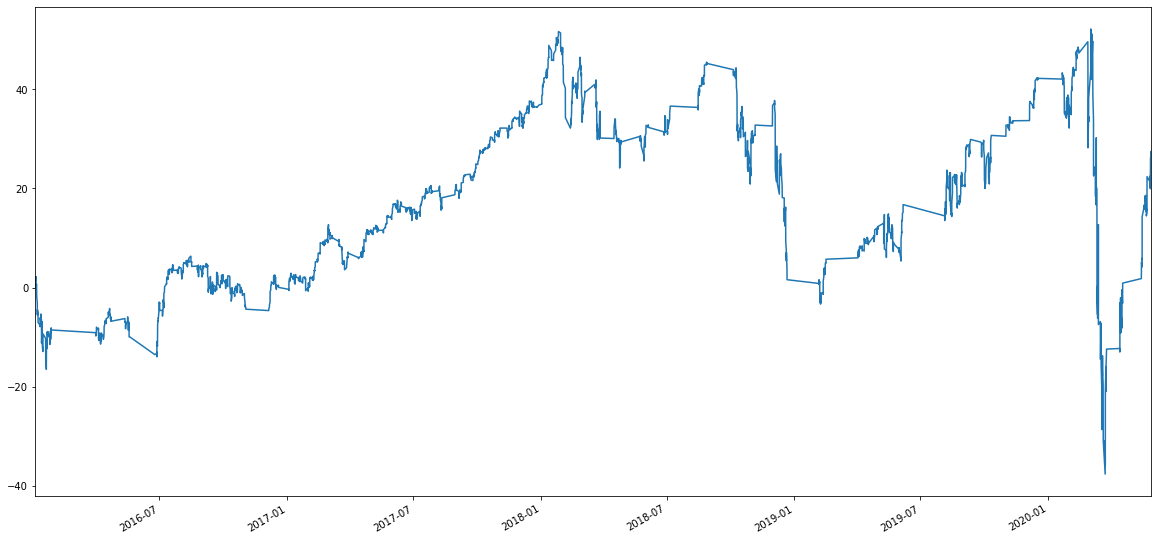

In [75]:
eq.plot()

In [76]:
eq.pct_change()[eq.pct_change() == eq.pct_change().max() ]

2017-02-01 10:00:00    2.814750e+12
Name: close, dtype: float64

In [77]:
signal['2016':].astype(int).diff().abs().sum()

94.0

In [78]:
import pyfolio as pf 

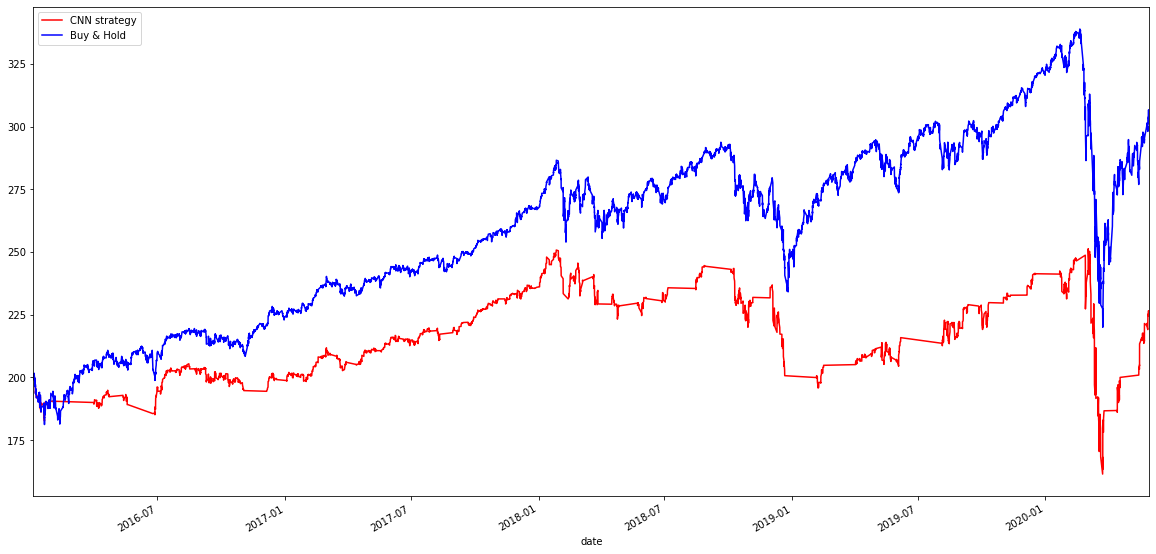

In [79]:
eq_relative = eq + tc[tc.index == eq.index[0]][0]
tw_relative = tc[eq.index[0]:]
plt.rcParams["figure.figsize"] = (20,10)
"""
        plt.rcParams["figure.figsize"] = (20,10)
        (hold*10).plot(label="hold")
        
        eq=creturn
        
        eq_relative = eq + tc[tc.index == eq.index[0]][0]
        bm_relative = tc[eq.index[0]:]

        eq_relative.plot(c="red",  label="BIAS strategy")
        bm_relative.plot(c="blue", label="Buy & Hold" )
        
#         creturn.plot(c="blue", label="BIAS strategy")
#         (tc-tc[0]).plot(c="red", label="Buy & Hold")
        plt.legend(loc='best')
"""
eq_relative.plot(c="red",  label="CNN strategy")
tw_relative.plot(c="blue", label="Buy & Hold")
plt.legend(loc='best')
eqpc = eq_relative.pct_change()
bmpc = tw_relative.pct_change() 

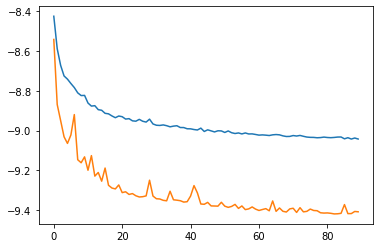

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.log(history.history['loss'][10:]))
plt.plot(np.log(history.history['val_loss'][10:]))

Start date,2016-01-04
End date,2020-05-28
Total months,116
,Backtest
Annual return,1.2%
Cumulative returns,12.7%
Annual volatility,11.5%
Sharpe ratio,0.16
Calmar ratio,0.03
Stability,0.34
Max drawdown,-35.7%


C:\Users\avlel\miniconda3\envs\finlab\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,35.73,2020-03-02,2020-03-23,NaT,NaN
1,21.92,2018-01-26,2019-02-07,2020-03-02,547
2,9.29,2016-01-05,2016-01-20,2016-07-13,137
3,5.34,2016-08-15,2016-12-05,2017-02-14,132
4,4.30,2017-03-01,2017-03-24,2017-05-23,59


C:\Users\avlel\miniconda3\envs\finlab\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


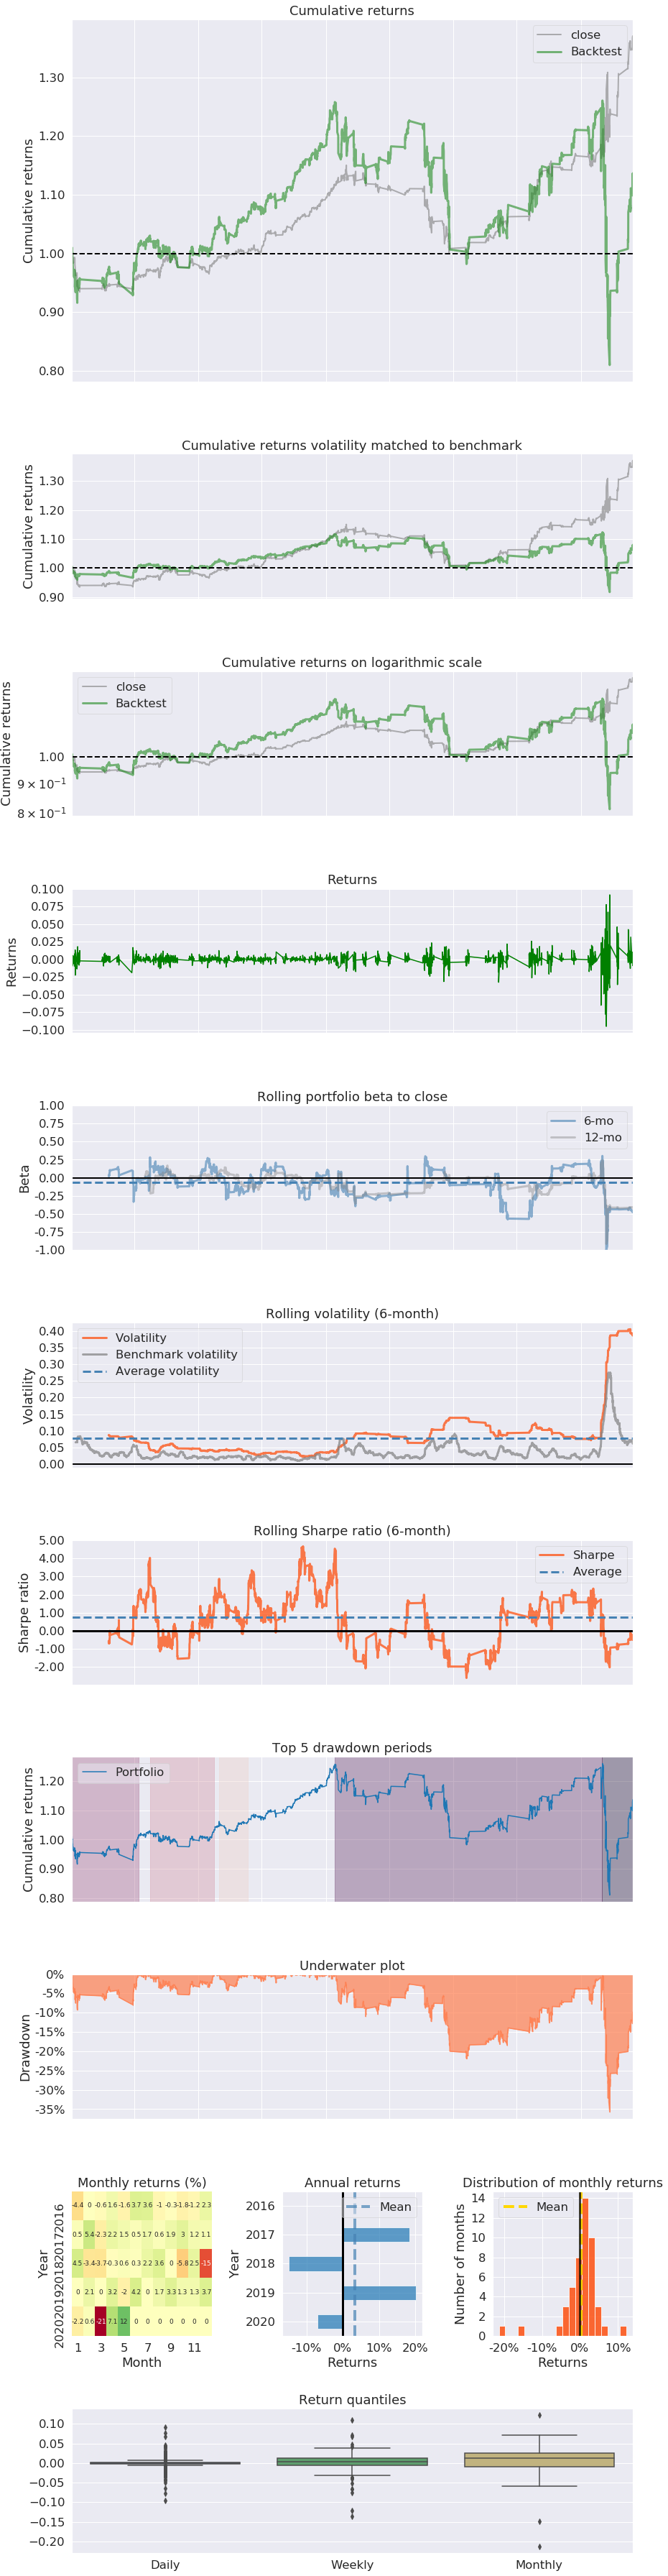

In [81]:
pf.create_returns_tear_sheet( eqpc, benchmark_rets=bmpc )  #relative